In [3]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## **Introduction**



This project had the objective of answering 3 tasks, the first is about the recommendation system using the concept of Content and Collaborative filtering (user-user or item-item). The second task is about Market Basket Analysis using and comparing the algorithms Apriori and FP Growth. And the third task is to create an interactive Dashboard aimed at young adults (18 - 35) to summarise the most crucial information in the data and demonstrate through your visual analysis why this dataset is appropriate for machine learning models in an online retail firm.

The project is divided into three parts, Part 1 to  Recommendation System, Part 2  Market Basket Analysis (MBA) and Part 3 Dashboard. For Parts 1 and 3 was used the Book Recommendation Dataset is available on Plataforme Kaggle, this dataset comprises 3 files: Users, Books and Ratings. And Part 2 used the Groceries Dataset.

## **Part 2**

In this analysis, I used the [Groceries](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset) dataset, which has 38765 rows of the purchase orders of people from grocery stores. 
After I prepared the data I have been analysed the dataset with visualizations and performed association rules mining with the Apriori algorithm and FP Growth algorithm.

#### **Data Preparation**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/CA2_ML4B/MBA/Groceries_dataset.csv')
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
# Checking for missing values

data.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
# Spliting the columns 'Date' to create the columns 'Day', 'Month' and 'Year' 

spliting = data['Date'].str.split(pat = '-', expand = True)
data['Day'] = spliting[0]
data['Month'] = spliting[1]
data['Year'] = spliting[2]
data

,Member_number,Date,itemDescription,Day,Month,Year
0,1808,21-07-2015,tropical fruit,21,07,2015
1,2552,05-01-2015,whole milk,05,01,2015
2,2300,19-09-2015,pip fruit,19,09,2015
3,1187,12-12-2015,other vegetables,12,12,2015
4,3037,01-02-2015,whole milk,01,02,2015
...,...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,08,10,2014
38761,2022,23-02-2014,candy,23,02,2014
38762,1097,16-04-2014,cake bar,16,04,2014
38763,1510,03-12-2014,fruit/vegetable juice,03,12,2014


In [8]:
look_up={'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
           '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

data['Month']= data['Month'].apply(lambda x: look_up[x])

In [9]:
from datetime import datetime

date_format = '%d-%m-%Y'

# Converter data para dia da semana
data['Date'] = pd.to_datetime(data['Date'], format=date_format)
data['day_of_week'] = data['Date'].dt.strftime('%A')

# Verificar se é fim de semana
data['weekday_weekend'] = data['day_of_week'].map(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

# Exibir o resultado
data


,Member_number,Date,itemDescription,Day,Month,Year,day_of_week,weekday_weekend
0,1808,2015-07-21,tropical fruit,21,Jul,2015,Tuesday,weekday
1,2552,2015-01-05,whole milk,05,Jan,2015,Monday,weekday
2,2300,2015-09-19,pip fruit,19,Sep,2015,Saturday,weekend
3,1187,2015-12-12,other vegetables,12,Dec,2015,Saturday,weekend
4,3037,2015-02-01,whole milk,01,Feb,2015,Sunday,weekend
...,...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,08,Oct,2014,Wednesday,weekday
38761,2022,2014-02-23,candy,23,Feb,2014,Sunday,weekend
38762,1097,2014-04-16,cake bar,16,Apr,2014,Wednesday,weekday
38763,1510,2014-12-03,fruit/vegetable juice,03,Dec,2014,Wednesday,weekday


In [10]:
data.describe(include = 'all')

,Member_number,Date,itemDescription,Day,Month,Year,day_of_week,weekday_weekend
count,38765.000000,38765,38765,38765,38765,38765,38765,38765
unique,NaN,728,167,31,12,2,7,2
top,NaN,2015-01-21 00:00:00,whole milk,03,Aug,2015,Thursday,weekday
freq,NaN,96,2502,1393,3496,20488,5620,27684
first,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,3003.641868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1153.611031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Data Visualization**

In this part of the project, I tried to analyse the trends in the transactions, I tried to answer questions like:

**What is the behaviour of sales by day, week, month and year?**

**What are the best-selling products?**

**What is the best sales month for each year?**

In [11]:
# review the value counts
freq_items = data['itemDescription'].value_counts()
freq_items.head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [12]:

# plot a bar chart to see the top sold items
fig = px.bar(data_frame = freq_items.head(20), title ='Top 20 Items', text_auto ='.3s',
                 labels = {
                     "index": "Items",
                     "values": "Quantity",
                     'lift': 'Lift'
                 })
fig.update_layout(title_x = 0.5, title_y = 0.86)
fig.show()

In [13]:
# Generate and display the treemap visualization of the frequency of items sold

frequency_of_items = data.groupby(pd.Grouper(key = 'itemDescription')).size().reset_index(name = 'count')
fig = px.treemap(frequency_of_items, path = ['itemDescription'], values = 'count')
fig.update_layout(
    title_text = 'Frequency of the Items Sold',
    title_x = 0.5, title_font = dict(size = 16),
    height = 999
)
fig.update_traces(textinfo = "label+value")
fig.show()

Milk, Bakery items, vegetables, fruits and drinks are the top items from the store. 

In [14]:
# Total product sales by Years

datayears = data.groupby('Year')['itemDescription'].count().reset_index() 
datayears

,Year,itemDescription
0,2014,18277
1,2015,20488


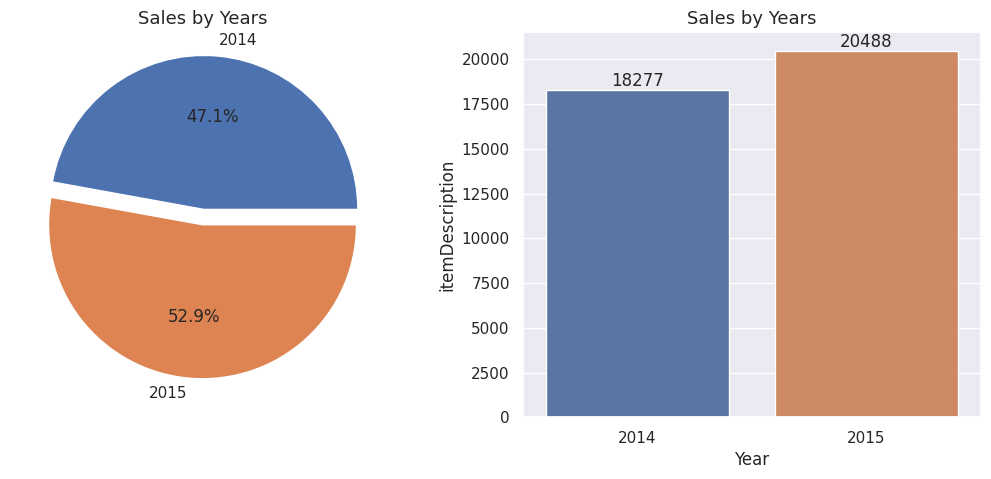

In [62]:
datayearsy = datayears['Year'].tolist()
dataitem = datayears['itemDescription'].tolist()

# Pier chart
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
explode = (0.1, 0)
colors = sns.color_palette('Paired')
plt.pie(dataitem, labels = datayearsy, autopct = '%1.1f%%', explode = explode)
plt.title('Sales by Years', size = 13)


# Bar chart
plt.subplot(1, 2, 2)
ax=sns.barplot(x = 'Year', y = 'itemDescription', data = datayears)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales by Years', size = 13)    
plt.show()

In the above graphs, it is possible to see that the year 2015 sold more than the year 2014.

In [16]:
# Total product sales by Month

datamonth = data.groupby(['Month', 'Year'])['itemDescription'].count().reset_index()
datamonth.rename(columns = {'itemDescription':'Quantity'},inplace = True)
datamonth

,Month,Year,Quantity
0,Apr,2014,1561
1,Apr,2015,1699
2,Aug,2014,1575
3,Aug,2015,1921
4,Dec,2014,1473
5,Dec,2015,1536
6,Feb,2014,1437
7,Feb,2015,1560
8,Jan,2014,1527
9,Jan,2015,1797


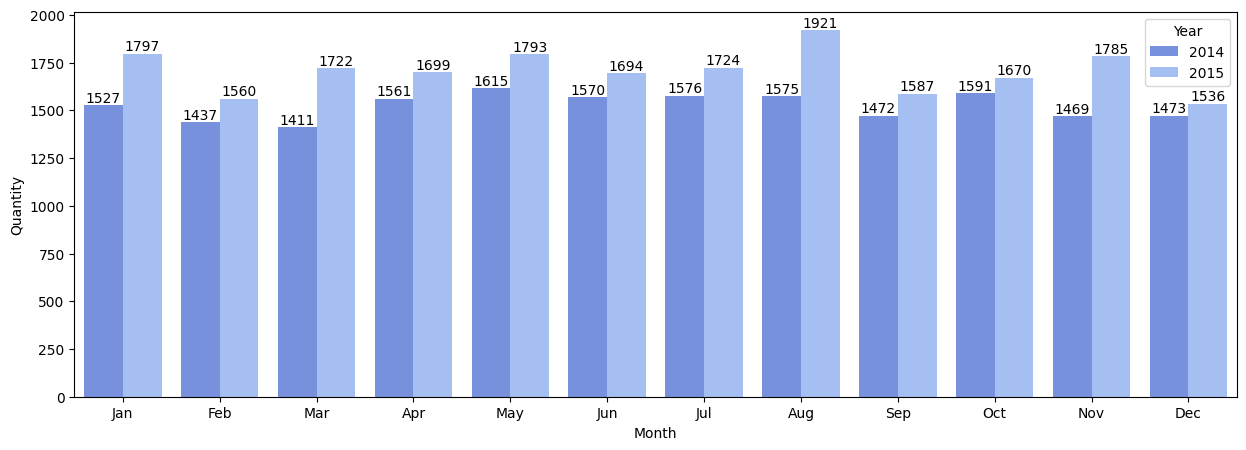

In [17]:
# Total product sales by Months

plt.figure(figsize = (15, 5))
from pandas.api.types import CategoricalDtype
months_ordered = CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
datamonth['Month'] = datamonth['Month'].astype(months_ordered)
datamonth = datamonth.sort_values(by = 'Month')

colors = sns.color_palette("coolwarm")
ax = sns.barplot(x = 'Month', y = 'Quantity', data = datamonth, hue = 'Year', palette = colors)
for i in ax.containers:
     ax.bar_label(i)
plt.show()  

May was the month with the highest sales in 2014, and August was the month with the highest sales in 2015.

In [18]:
# Total product sales by Week

dataweek = data.groupby(['day_of_week', 'Year'])['itemDescription'].count().reset_index()
dataweek.rename(columns = {'itemDescription':'Quantity'},inplace = True)
dataweek.sort_values(by = 'day_of_week')
dataweek

,day_of_week,Year,Quantity
0,Friday,2014,2560
1,Friday,2015,3002
2,Monday,2014,2593
3,Monday,2015,2789
4,Saturday,2014,2665
5,Saturday,2015,2886
6,Sunday,2014,2536
7,Sunday,2015,2994
8,Thursday,2014,2738
9,Thursday,2015,2882


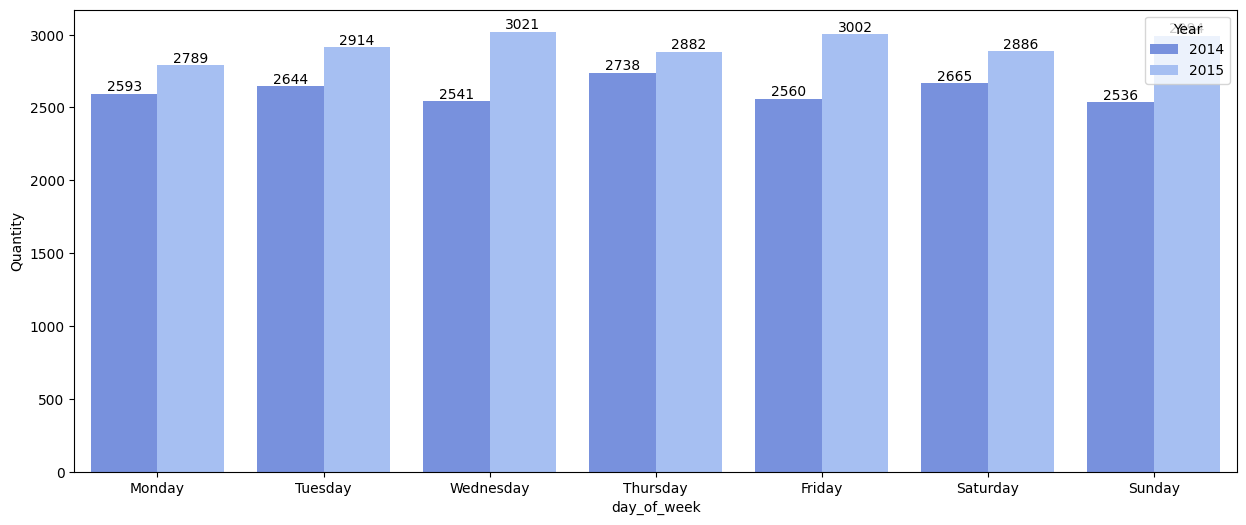

In [19]:
plt.figure(figsize = (15, 6))
from pandas.api.types import CategoricalDtype
week_ordered = CategoricalDtype(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dataweek['day_of_week'] = dataweek['day_of_week'].astype(week_ordered)
dataweek = dataweek.sort_values(by = 'day_of_week')

colors = sns.color_palette("coolwarm")
ax = sns.barplot(x = 'day_of_week', y = 'Quantity', data = dataweek, hue = 'Year', palette = colors)
for i in ax.containers:
     ax.bar_label(i)
plt.show()  

#### **Times Serie Analysis**

In [20]:
data.set_index('Date', inplace = True)

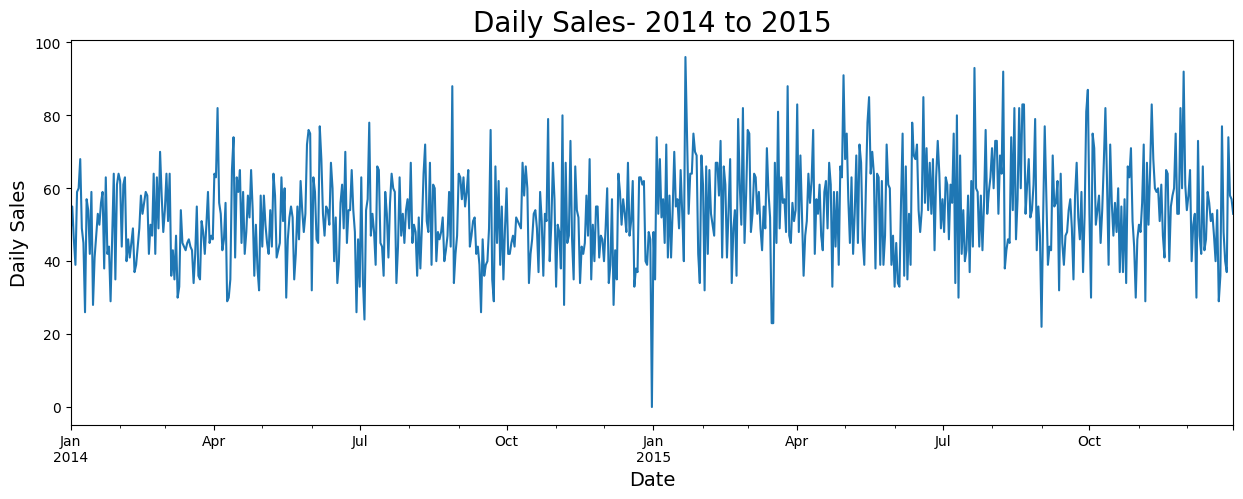

In [21]:
# Line graph to visualize daily sales over time

data.resample('D')[['itemDescription']].count().plot(kind = 'line', figsize = (15,5), legend = None)
plt.title('Daily Sales- 2014 to 2015', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Daily Sales', fontsize = 14)
plt.show()

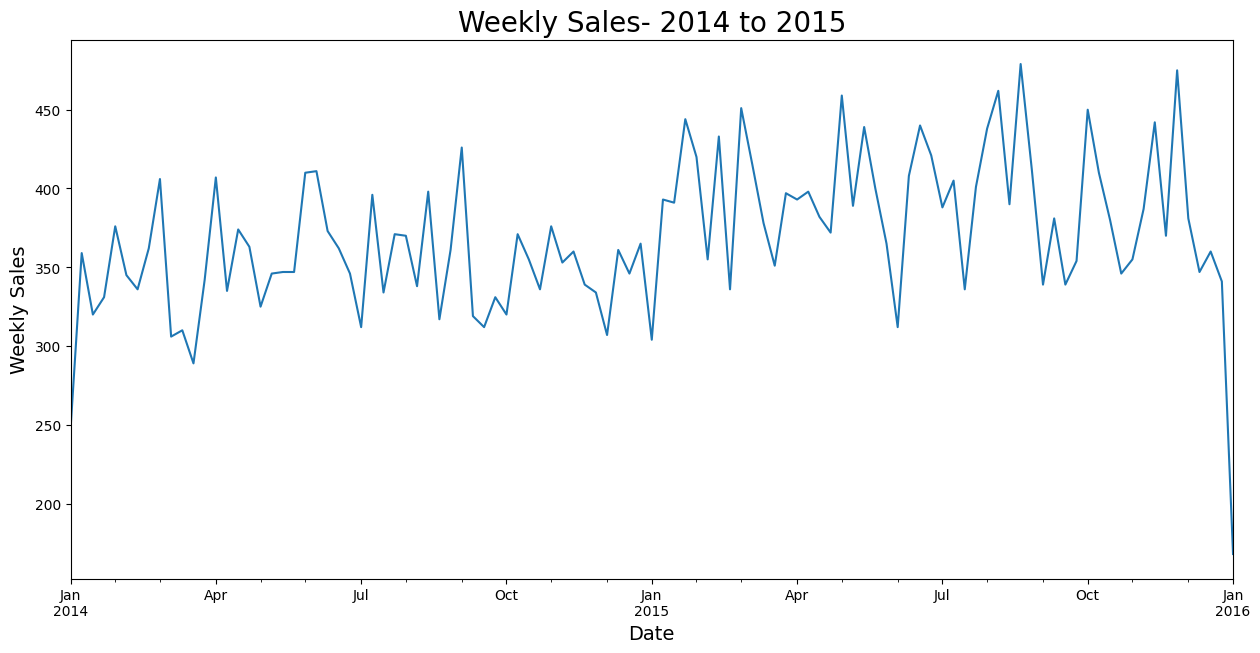

In [22]:
# line graph to visualize monthly  sales over time

data.resample('W')[['itemDescription']].count().plot(kind = 'line', figsize = (15,7), legend=None )
plt.title('Weekly Sales- 2014 to 2015', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Weekly Sales', fontsize = 14)
plt.show()

Reducing the noise by taking into account the overall number of things purchased each month.

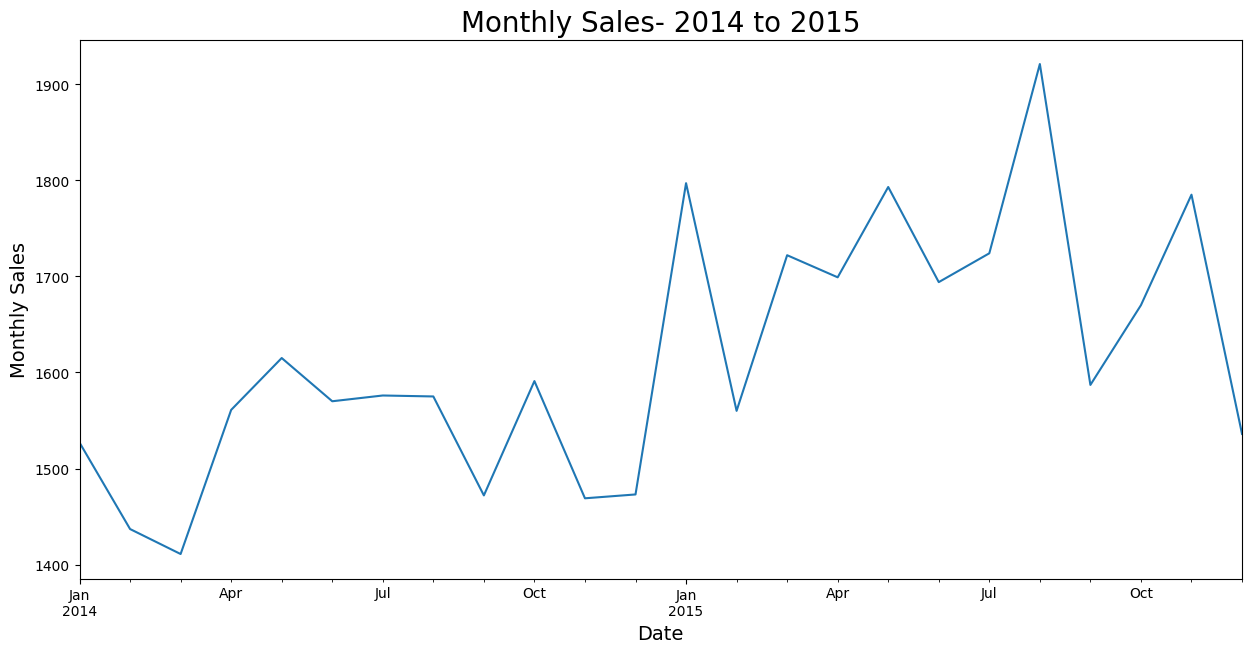

In [23]:
# line graph to visualize monthly  sales over time

data.resample('M')[['itemDescription']].count().plot(kind = 'line', figsize = (15,7), legend=None )
plt.title('Monthly Sales- 2014 to 2015', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Sales', fontsize = 14)
plt.show()

Lets Have a Different View of the above Monthly Purchases- 2014 to 2015 Graph, to better compare the two years.

In [24]:
temp = data.groupby(['Year','Month'], as_index = False).agg(Sales = ('itemDescription', 'count'))
temp.head()

,Year,Month,Sales
0,2014,Apr,1561
1,2014,Aug,1575
2,2014,Dec,1473
3,2014,Feb,1437
4,2014,Jan,1527


In [25]:
from pandas.api.types import CategoricalDtype

months_ordered = CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
temp['Month'] = temp['Month'].astype(months_ordered)
temp = temp.sort_values(by = 'Month')
fig = px.line(temp, x= 'Month', y = 'Sales', color = 'Year')
fig.update_layout(title_text = 'Monthly Sales - 2014 to 2015', title_x = 0.5,
                 title = {'font': {'size':20}})

It is clearly seen that the year 2015 was better than 2014. Sold more in every month of the year 2015, with a peak in August of sales with a total of 1921.

The months of February, September and December were the months with the fewer sales, with a total of less than 1600 sales.

In [26]:
temp2 = data.groupby(['Year', 'day_of_week'], as_index = False).agg(Sales = ('itemDescription', 'count'))

order_days = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
temp2['day_of_week'] = temp2['day_of_week'].astype(order_days)
temp2 = temp2.sort_values(by = 'day_of_week')

fig = px.line(temp2, x = 'day_of_week', y = 'Sales', color = 'Year')
fig.update_layout(title_text ='Weekday Sales - 2014 to 2015', title_x = 0.5,
                 title = {'font': {'size':20}})

In the above graph, it is curious the correlation between the weekdays in comparison to the years. The days as had more sales in 2014 were the days with fewer sales in 2015. And the days with fewer sales in 2014 were the days with more sales in 2015.

In [27]:
temp3 = data.groupby(['Year','Day'], as_index = False).agg(Sales = ('itemDescription', 'count'))

fig = px.line(temp3, x = 'Day', y = 'Sales', color = 'Year')
fig.update_layout(title_text = 'Sales Per Days of the Month', title_x = 0.5,
                 title = {'font':{'size':20}})
fig.show()

It is clearly seen that the buy volume decreases at the end.
There is no seasonality or trend, yet the sales quantity purchased is constant over time.

### **MBA - Market Basket Analysis**

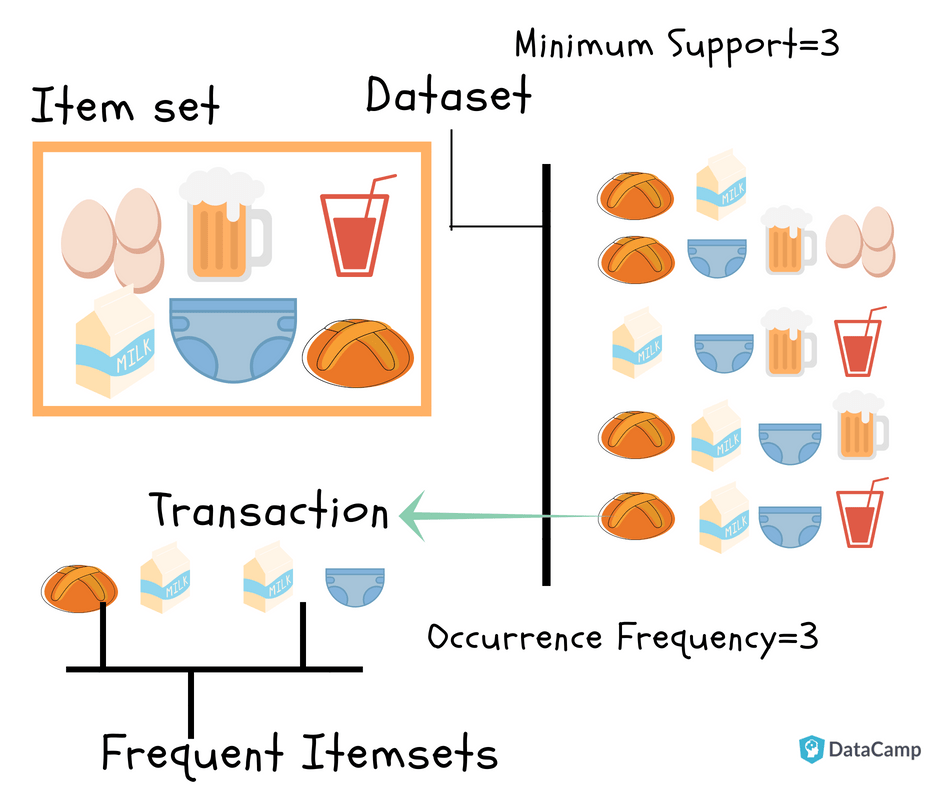




Market Basket Analysis can be employed in several areas, but is best known for transaction analysis in the field of sales. One of the most used techniques is the association rules, with this we can discover relationships between purchased items aiming at cross-selling between products. Based on this information, we can improve the store's layout, create promotions and perform analysis.

In this part of this assessment,  I used two algorithms, Apriori and FP Growth, then I compared the two algorithms.

Bellow, there are the steps for doing the basket analysis.

Before I analyse the Apriori and FP Growth is necessary to talk about the association rules and the ways to measure it. An association rule is composed of an antecedent and a consequent, and both consist of a set of items. There are 3 ways to measure association: Support, Confidence and Lift.


*   **Support:** Support indicates how frequently an item set occurs in the database. If the support of this set is too small it means that we don't have enough information to draw conclusions. 
*   **Confidence:** Confidence indicates how often the rule holds. However, the confidence for a rule with a very frequent consequent will always be high, so considering only the confidence value can lead to inaccurate analysis.
*   **Lift:** Represents the increase in sales from the consequent given the antecedent. Lift = 1 means there is no correlation in the set, Lift > 1 means there is a positive correlation in the set and Lift < 1 means there is a negative correlation in the set.

Before proceeding with algorithms, I have to prepare the data in a sparse matrix format where products are in column itemDescription and Member_number as index. 

In [28]:
data['Member_number']= data['Member_number'].astype('str')
data['itemDescription']= data['itemDescription'].str.strip()
data.head()

,Member_number,itemDescription,Day,Month,Year,day_of_week,weekday_weekend
Date,,,,,,,
2015-07-21,1808,tropical fruit,21,Jul,2015,Tuesday,weekday
2015-01-05,2552,whole milk,05,Jan,2015,Monday,weekday
2015-09-19,2300,pip fruit,19,Sep,2015,Saturday,weekend
2015-12-12,1187,other vegetables,12,Dec,2015,Saturday,weekend
2015-02-01,3037,whole milk,01,Feb,2015,Sunday,weekend


In [29]:
data.shape

(38765, 7)

In [30]:
# Creating the matrix 

basket = (data.groupby(['Member_number','itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index())

basket

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3894,4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3895,4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
basket=basket.drop(columns='Member_number')

In [32]:
# Create and declare a method named as 'encode_units()'

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

basket_sets

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [33]:
# review the unique values in the member ID and item columns

unique_customers = len(data['Member_number'].unique())
unique_itens = len(data['itemDescription'].unique())
print('There are', unique_customers, 'unique customers')
print('There are', unique_itens, 'unique grocery item')

There are 3898 unique customers
There are 167 unique grocery item


In [34]:
# Get the items purchased for each transaction

transactions = [a[1]['itemDescription'].tolist() for a in list(data.groupby(['Member_number','Date']))]
all_transactions = len(transactions)
print('There are', all_transactions, 'unique transactions')

There are 14963 unique transactions


In [35]:
# Look at the 10 first transactions

transactions[0:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd']]

##### **Apriori**

The Apriori takes advantage of the fact that if a set A is not frequent then a superset A' of A (A ⊃ A') will not be either. This property, known as anti-monotone, eliminates unnecessary calculations for many sets, causing a reduction in execution time.

In [36]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

For this analysis, 1% of transactions will be considered, that is to say, the minimum support will be 0.01. 

In [37]:
start_time = time.time()
frequent_itemsets= apriori(basket_sets, min_support = 0.01, use_colnames = True)
end_time = time.time()
execution_time_apriori = end_time - start_time
print(f'The Apriori execution took:', execution_time_apriori, 'seconds')

The Apriori execution took: 2.308272123336792 seconds


In [38]:
# Get the support value by Apriori algorithm

frequent_itemsets.sort_values(by = 'support', ascending=False)

,support,itemsets
113,0.458184,(whole milk)
69,0.376603,(other vegetables)
84,0.349666,(rolls/buns)
94,0.313494,(soda)
114,0.282966,(yogurt)
...,...,...
2269,0.010005,"(whole milk, ice cream, sausage)"
2266,0.010005,"(rolls/buns, other vegetables, ice cream)"
2263,0.010005,"(whole milk, herbs, other vegetables)"
956,0.010005,"(pork, misc. beverages)"


Above is the list (in descending order) of the most frequently purchased items. Item whole milk is present in 45% of baskets, while item other vegetables is present in 37% of baskets.

In [39]:
# Create the association rules

rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
4,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801
...,...,...,...,...,...,...,...,...,...,...
15255,(whole milk),"(yogurt, soda, other vegetables, rolls/buns)",0.458184,0.020010,0.013597,0.029675,1.483002,0.004428,1.009961,0.601111
15256,(other vegetables),"(whole milk, soda, yogurt, rolls/buns)",0.376603,0.024628,0.013597,0.036104,1.465954,0.004322,1.011905,0.509869
15257,(rolls/buns),"(whole milk, soda, yogurt, other vegetables)",0.349666,0.027963,0.013597,0.038885,1.390578,0.003819,1.011364,0.431893
15258,(soda),"(whole milk, yogurt, other vegetables, rolls/b...",0.313494,0.034377,0.013597,0.043372,1.261658,0.002820,1.009403,0.302098


I initially applied the association rule function to derive rules where I use lift metric. I created 15260 rules, this is a considerable amount, so I tried to find the best association rules.

In [40]:
rules_sorted = rules[(rules['lift'] >= 2)]
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7020,"(meat, whole milk)",(domestic eggs),0.034890,0.133145,0.010262,0.294118,2.208999,0.005616,1.228044,0.567092
7022,"(whole milk, domestic eggs)",(meat),0.070292,0.063622,0.010262,0.145985,2.294561,0.005789,1.096442,0.606843
7023,(meat),"(whole milk, domestic eggs)",0.063622,0.070292,0.010262,0.161290,2.294561,0.005789,1.108497,0.602521
7025,(domestic eggs),"(meat, whole milk)",0.133145,0.034890,0.010262,0.077071,2.208999,0.005616,1.045704,0.631370
10810,"(beef, rolls/buns)","(soda, other vegetables)",0.040534,0.124166,0.010262,0.253165,2.038916,0.005229,1.172727,0.531070
...,...,...,...,...,...,...,...,...,...,...
15220,"(other vegetables, shopping bags)","(whole milk, yogurt, rolls/buns)",0.073114,0.065931,0.010005,0.136842,2.075527,0.005185,1.082153,0.559071
15221,"(yogurt, other vegetables)","(whole milk, rolls/buns, shopping bags)",0.120318,0.041303,0.010005,0.083156,2.013296,0.005036,1.045648,0.572141
15222,"(rolls/buns, shopping bags)","(whole milk, yogurt, other vegetables)",0.068753,0.071832,0.010005,0.145522,2.025880,0.005066,1.086241,0.543773
15223,"(yogurt, rolls/buns)","(whole milk, other vegetables, shopping bags)",0.111339,0.042842,0.010005,0.089862,2.097492,0.005235,1.051662,0.588796


In [65]:
rules_sorted = rules[(rules['lift'] > 2) & (rules['confidence'] >= 0.35) ].sort_values(by='lift', ascending=False).reset_index(drop=True) 
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(yogurt, bottled water, rolls/buns)","(whole milk, other vegetables)",0.026424,0.191380,0.010518,0.398058,2.079934,0.005461,1.343352,0.533308
1,"(yogurt, rolls/buns, shopping bags)","(whole milk, other vegetables)",0.025141,0.191380,0.010005,0.397959,2.079417,0.005194,1.343131,0.532483
2,"(yogurt, other vegetables, sausage)","(whole milk, rolls/buns)",0.037199,0.178553,0.013597,0.365517,2.047107,0.006955,1.294672,0.531268
3,"(frozen meals, other vegetables)","(whole milk, rolls/buns)",0.027707,0.178553,0.010005,0.361111,2.022430,0.005058,1.285743,0.519951


In [42]:
print(basket_sets['rolls/buns'].sum())
print(basket_sets['other vegetables'].sum())
print(basket_sets['bottled water'].sum())
print(basket_sets['whole milk'].sum())
print(basket_sets['yogurt'].sum())

1363
1468
833
1786
1103


After applying a lift filter greater than 2 and confidence greater than or equal to 35%, I found ten rules with consequent support higher than 17%. We see that itemsets (rolls/buns, yogurt, bottled water) and (whole milk, other vegetables) have the highest lift. That means that once we know that a customer has boughtrolls/buns, yogurt and bottled water, it becomes 2.07 times more likely that he will also buy whole milk and other vegetables.
Analyzing the number of items sold separately, we can see that it is possible to leverage sales of whole milk, other vegetables and rolls/buns through recommendations.

In [43]:
rules_sorted2 = rules[(rules['lift'] > 1) & (rules['confidence'] >= 0.70) ].sort_values(by='lift', ascending=False).reset_index(drop=True) 
rules_sorted2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(meat, domestic eggs)",(whole milk),0.013084,0.458184,0.010262,0.784314,1.711789,0.004267,2.512057,0.421328
1,"(fruit/vegetable juice, chocolate)",(whole milk),0.014366,0.458184,0.010775,0.750000,1.636898,0.004192,2.167265,0.394760
2,"(yogurt, bottled water, other vegetables, roll...",(whole milk),0.014110,0.458184,0.010518,0.745455,1.626978,0.004053,2.128564,0.390879
3,"(yogurt, bottled water, pip fruit)",(whole milk),0.013853,0.458184,0.010262,0.740741,1.616689,0.003914,2.089863,0.386811
4,"(yogurt, rolls/buns, brown bread)",(whole milk),0.017445,0.458184,0.012827,0.735294,1.604802,0.004834,2.046862,0.383561
5,"(bottled water, other vegetables, brown bread)",(whole milk),0.016675,0.458184,0.012057,0.723077,1.578138,0.004417,1.956559,0.372554
6,"(yogurt, bottled beer, rolls/buns)",(whole milk),0.019241,0.458184,0.013853,0.720000,1.571422,0.005038,1.935058,0.370768
7,"(yogurt, soda, curd)",(whole milk),0.015136,0.458184,0.010775,0.711864,1.553666,0.003840,1.880421,0.361838
8,"(yogurt, other vegetables, rolls/buns, shoppin...",(whole milk),0.014110,0.458184,0.010005,0.709091,1.547613,0.003540,1.862494,0.358908
9,"(rolls/buns, domestic eggs, sausage)",(whole milk),0.014879,0.458184,0.010518,0.706897,1.542823,0.003701,1.848550,0.357152


After applying a lift filter greater than 1 and confidence greater than or equal to 70%, I found ten rules with consequent support higher than 45%. 
We see that itemsets (meat, domestic eggs) and (whole milk) have the highest lift. That means that once we know that a customer has bought meat and domestic eggs, it becomes 1.7 times more likely that he will also buy whole milk. Analyzing the consequent items, we can see that it is possible to leverage even more sales of whole milk through recommendations.

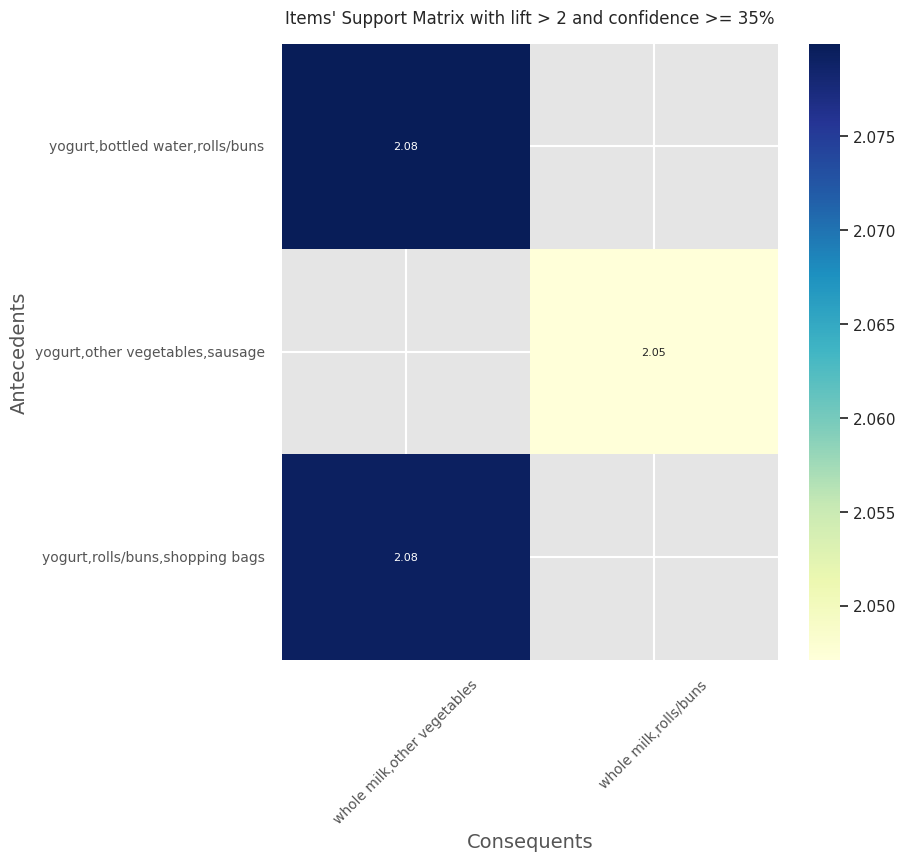

In [66]:
# plot a heatmap to know how strong the association is based on lift values
rules_sorted['lhs items'] = rules_sorted['antecedents'].apply(lambda x:len(x) )
rules_sorted[rules_sorted['lhs items'] >=2 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_sorted['antecedents_'] = rules_sorted['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted['consequents_'] = rules_sorted['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_sorted[rules_sorted['lhs items']>2].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()
ax = sns.heatmap(data=pivot, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift > 2 and confidence >= 35%", fontsize=12, y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

In [67]:
import plotly.express as px
# Replace frozen sets with strings
rules_sorted['antecedents_'] = rules_sorted['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted['consequents_'] = rules_sorted['consequents'].apply(lambda a: ','.join(list(a)))

# Criar o gráfico de Parallel Categories Diagram
fig = px.parallel_categories(rules_sorted, dimensions=['antecedents_', 'consequents_'], color='lift')

# Personalizar o layout do gráfico
fig.update_layout(
    title='Parallel Categories Diagram with lift > 2 and confidence >= 35%',
    title_x=0.5,
    font=dict(size=12)
)

# Exibir o gráfico
fig.show()


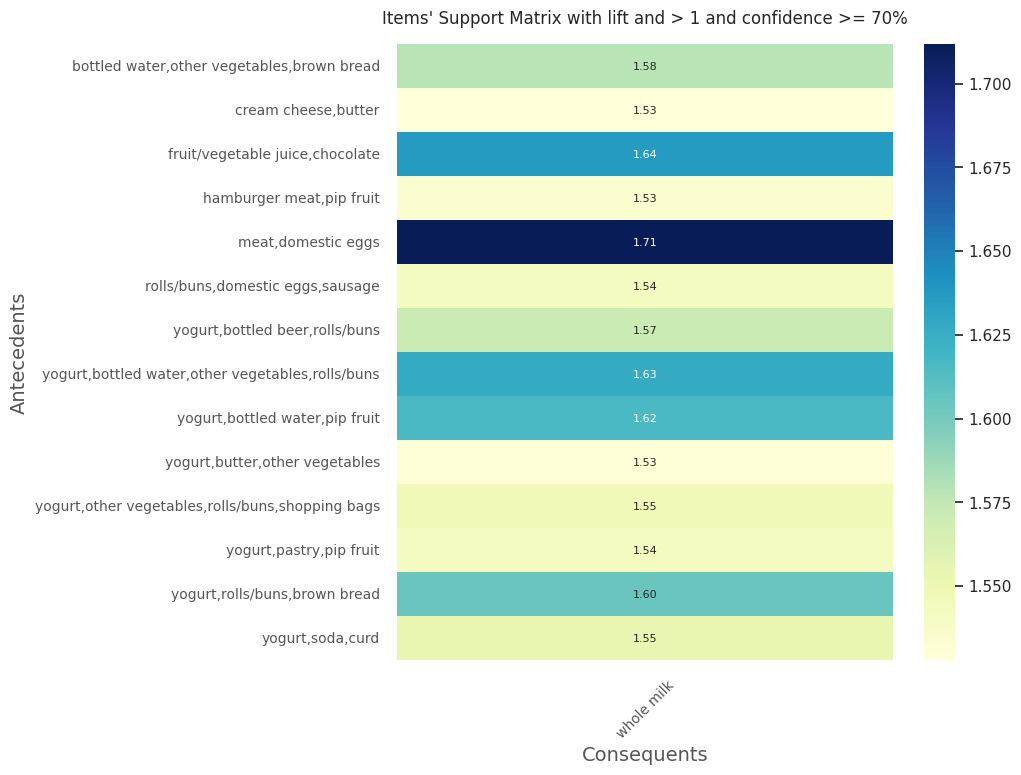

In [46]:
# plot a heatmap to know how strong the association is based on lift values
rules_sorted2['lhs items'] = rules_sorted2['antecedents'].apply(lambda x:len(x) )
rules_sorted2[rules_sorted2['lhs items'] >=1 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_sorted2['antecedents_'] = rules_sorted2['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted2['consequents_'] = rules_sorted2['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_sorted2[rules_sorted2['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()
ax = sns.heatmap(data=pivot, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift and > 1 and confidence >= 70%", fontsize=12, y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

In [47]:

# Replace frozen sets with strings
rules_sorted2['antecedents_'] = rules_sorted2['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted2['consequents_'] = rules_sorted2['consequents'].apply(lambda a: ','.join(list(a)))

# Create a Parallel Categories Diagram
fig = px.parallel_categories(rules_sorted2, dimensions=['antecedents_', 'consequents_'], color='lift')

fig.update_layout(
    title='Parallel Categories Diagram with lift > 1 and confidence >= 70%',
    title_x=0.5,
    font=dict(size=12)
)

fig.show()


Further analysis of the rules can allow a retailer to do some of the following: identify Key Value Items, inform pricing strategy, consider products for recommendations and so on.

##### **FP Growth**

The algorithm uses a tree structure to represent the database, this representation is called a frequent-pattern tree or FP tree. FP-Growth outperforms many other algorithms such as Eclat, Relim, TreeProjec

In [48]:
#!pip install mlxtend

In [49]:
#!pip install -U mlxtend

In [50]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

For this analysis, as well as in the Apriori algorithm, 1% of transactions will be considered, that is to say, the minimum support will be 0.01.

In [51]:
start_time_fp = time.time()
frequent_itemsets_fp = fpgrowth(basket_sets, min_support = 0.01, use_colnames = True)
end_time_fp = time.time()
execution_time = end_time_fp - start_time_fp
print(f"Tempo de execução: {execution_time} segundos")

Tempo de execução: 0.6855769157409668 segundos


In [52]:
frequent_itemsets_fp.sort_values(by='support',ascending=False)

,support,itemsets
0,0.458184,(whole milk)
17,0.376603,(other vegetables)
11,0.349666,(rolls/buns)
1,0.313494,(soda)
2,0.282966,(yogurt)
...,...,...
1216,0.010005,"(pastry, tropical fruit, pip fruit)"
2412,0.010005,"(root vegetables, onions, rolls/buns)"
2905,0.010005,"(other vegetables, domestic eggs, pork)"
677,0.010005,"(curd, other vegetables, whipped/sour cream)"


Above is the list (in descending order) of the most frequently purchased items (alone or with other products). Item whole milk is present in 45% of baskets, while item other vegetables are present in 37% of baskets, the same values I got in the Apriori algorithm.

In [53]:
# Storing association rules

rules_fp = association_rules(frequent_itemsets_fp, metric = "lift", min_threshold = 1)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
1,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
2,(soda),(rolls/buns),0.313494,0.349666,0.119805,0.382160,1.092928,0.010187,1.052593,0.123855
3,(rolls/buns),(soda),0.349666,0.313494,0.119805,0.342627,1.092928,0.010187,1.044316,0.130743
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,0.006103,1.032237,0.071601
...,...,...,...,...,...,...,...,...,...,...
15255,(seasonal products),(other vegetables),0.025911,0.376603,0.010005,0.386139,1.025319,0.000247,1.015533,0.025351
15256,(soda),(frozen dessert),0.313494,0.023089,0.010005,0.031915,1.382270,0.002767,1.009117,0.402840
15257,(frozen dessert),(soda),0.023089,0.313494,0.010005,0.433333,1.382270,0.002767,1.211481,0.283088
15258,(whole milk),(frozen dessert),0.458184,0.023089,0.012057,0.026316,1.139766,0.001479,1.003314,0.226326


In [54]:
rules_sorted_fp = rules[(rules['lift'] >= 2)]
rules_sorted_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7020,"(meat, whole milk)",(domestic eggs),0.034890,0.133145,0.010262,0.294118,2.208999,0.005616,1.228044,0.567092
7022,"(whole milk, domestic eggs)",(meat),0.070292,0.063622,0.010262,0.145985,2.294561,0.005789,1.096442,0.606843
7023,(meat),"(whole milk, domestic eggs)",0.063622,0.070292,0.010262,0.161290,2.294561,0.005789,1.108497,0.602521
7025,(domestic eggs),"(meat, whole milk)",0.133145,0.034890,0.010262,0.077071,2.208999,0.005616,1.045704,0.631370
10810,"(beef, rolls/buns)","(soda, other vegetables)",0.040534,0.124166,0.010262,0.253165,2.038916,0.005229,1.172727,0.531070
...,...,...,...,...,...,...,...,...,...,...
15220,"(other vegetables, shopping bags)","(whole milk, yogurt, rolls/buns)",0.073114,0.065931,0.010005,0.136842,2.075527,0.005185,1.082153,0.559071
15221,"(yogurt, other vegetables)","(whole milk, rolls/buns, shopping bags)",0.120318,0.041303,0.010005,0.083156,2.013296,0.005036,1.045648,0.572141
15222,"(rolls/buns, shopping bags)","(whole milk, yogurt, other vegetables)",0.068753,0.071832,0.010005,0.145522,2.025880,0.005066,1.086241,0.543773
15223,"(yogurt, rolls/buns)","(whole milk, other vegetables, shopping bags)",0.111339,0.042842,0.010005,0.089862,2.097492,0.005235,1.051662,0.588796


In [55]:
rules_sorted_fp = rules_fp[(rules_fp['lift'] > 2) & (rules_fp['confidence'] >= 0.3) ].sort_values(by='lift', ascending=False).reset_index(drop=True) 
rules_sorted_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(other vegetables, rolls/buns, sausage)","(whole milk, yogurt)",0.041816,0.150590,0.013597,0.325153,2.159196,0.007300,1.258671,0.560294
1,"(frozen meals, whole milk)","(other vegetables, rolls/buns)",0.032581,0.146742,0.010005,0.307087,2.092699,0.005224,1.231407,0.539733
2,"(yogurt, bottled water, rolls/buns)","(whole milk, other vegetables)",0.026424,0.191380,0.010518,0.398058,2.079934,0.005461,1.343352,0.533308
3,"(yogurt, rolls/buns, shopping bags)","(whole milk, other vegetables)",0.025141,0.191380,0.010005,0.397959,2.079417,0.005194,1.343131,0.532483
4,"(curd, sausage)","(whole milk, yogurt)",0.032068,0.150590,0.010005,0.312000,2.071850,0.005176,1.234607,0.534479
5,"(whole milk, yogurt, sausage)","(other vegetables, rolls/buns)",0.044895,0.146742,0.013597,0.302857,2.063876,0.007009,1.223936,0.539705
6,"(whole milk, yogurt, shopping bags)","(other vegetables, rolls/buns)",0.033094,0.146742,0.010005,0.302326,2.060254,0.005149,1.223003,0.532237
7,"(yogurt, other vegetables, sausage)","(whole milk, rolls/buns)",0.037199,0.178553,0.013597,0.365517,2.047107,0.006955,1.294672,0.531268
8,"(other vegetables, rolls/buns, shopping bags)","(whole milk, yogurt)",0.032837,0.150590,0.010005,0.304688,2.023291,0.005060,1.221623,0.522927
9,"(frozen meals, other vegetables)","(whole milk, rolls/buns)",0.027707,0.178553,0.010005,0.361111,2.022430,0.005058,1.285743,0.519951


After applying a lift filter greater than 2 and confidence greater than or equal to 30%, I found ten rules with consequent support higher than 14%. We see that itemsets (sausage, rolls/buns, other vegetable) and (whole milk, yogurt) have the highest lift. That means that once we know that a customer has bought sausage, rolls/buns and other vegetable, it becomes 2.15 times more likely that he will also buy whole milk and yogurt.

##### **Comparative Apriori vs FP Growth**

FP Growth has a more complex algorithm, but it brings results much more efficiently. With FP Growth it is only necessary to scan the database twice, while Apriori scans the transactions for each iteration. Furthermore, storing the tree in memory is much more compact. The disadvantage of FP Growth would be to apply it in incremental mining (when new transactions are added to the database), as it would need to update its entire structure. But the dataset was not too big in this case, so I tried to compare both on execution time.

In [56]:
# Calculating run time for apriori

warnings.filterwarnings('ignore')

l = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
t_ap = []

for i in l:
    t1 = time.time()
    apriori(basket_sets, min_support = i, use_colnames = True)
    
    t2 = time.time()
    t_ap.append((t2 - t1) * 1000)

In [57]:
# Calculating run time for fp growth

warnings.filterwarnings('ignore')

l = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
t_fp = []

for i in l:
    t1 = time.time()
    fpgrowth(basket_sets, min_support = i, use_colnames = True)
    
    t2 = time.time()
    t_fp.append((t2 - t1) * 1000)

In [58]:
# Comparing time run of apriori and fp growth

time = pd.DataFrame({'Support Threshold': l, 'Apriori': t_ap, 'FP Growth': t_fp})
fig = px.line(time, x='Support Threshold', y=['Apriori', 'FP Growth'], labels={'value': 'Run Time in ms'}, title='Apriori vs FP Growth Run Time')
fig.update_layout(xaxis_title='Min Support Threshold', yaxis_title='Run Time in ms', legend_title='Algorithm')
fig.show()


Apriori and FP-Growth are two popular algorithms used in association rule mining, which is a technique for finding interesting relationships or associations among items in a large dataset.

Apriori has a longer delay with a low min support threshold, the execution time improves considerably when the min support threshold increases, while the FP Growth algorithm has basically the same performance regardless of the min support threshold, this is because it generates and scans a large number of candidate itemsets at each level. FP-Growth, on the other hand, is generally faster as it avoids generating candidate itemsets and utilizes the FP-tree efficient

Considering that one product is related to the other, it is possible to define marketing strategies so that one product is promoted by the other. Therefore, how to organize products on a shelf is not a simple random task.